## Importando Bibliotecas

In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv("/Users/lucas/TCC/deputados_federais_com_financiamento.csv")

## Limpeza

In [15]:
df['Decision'] = 'NaN'

In [16]:
for index, row in df.iterrows():
    if row['DS_SIT_TOT_TURNO'] == "SUPLENTE" or row['DS_SIT_TOT_TURNO'] == "N�O ELEITO" or row['DS_SIT_TOT_TURNO'] == "#NULO#" :
        df.loc[index,'Decision'] = 0
    else: df.loc[index,'Decision'] = 1

In [17]:
## fatorando

df['SG_PARTIDO_F'] = pd.factorize(df['SG_PARTIDO'])[0]
df['ST_REELEICAO_F'] = pd.factorize(df['ST_REELEICAO'])[0]
df['ST_DECLARAR_BENS_F'] = pd.factorize(df['ST_DECLARAR_BENS'])[0]


In [18]:
## Utilizando todo o sample

sample = df[["CD_SITUACAO_CANDIDATURA","SQ_COLIGACAO","NR_IDADE_DATA_POSSE","CD_GENERO","CD_ESTADO_CIVIL",
             "CD_COR_RACA","CD_OCUPACAO","VR_DESPESA_MAX_CAMPANHA","FIN_COMERCIALIZACAO_DE_BENS_EVENTOS",
             "FIN_DOACAO_PELA_INTERNET","FIN_RECURSOS_FINANCIAMENTO_COLETIVO","FIN_ORIGEM_NAO_IDENTIFICADA",
             "FIN_RECURSOS_OUTROS_CANDIDATOS","FIN_PARTIDO_POLITICO","FIN_RECURSOS_PESSOAS_FISICAS",
             "RECURSOS_PROPRIOS","FIN_APLICACOES_FINANCEIRAS","SG_PARTIDO_F","ST_REELEICAO_F","ST_DECLARAR_BENS_F","Decision"]]

In [19]:
sample.dropna(inplace=True)

In [20]:
sample.Decision=sample.Decision.astype('int')

In [25]:
# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(sample.drop('Decision',axis=1),sample['Decision'],test_size=0.2)

In [26]:
X_train.shape,X_test.shape

((6870, 20), (1718, 20))

In [27]:
y_train.shape,y_test.shape

((6870,), (1718,))

In [28]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

# Aplicando K means

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
y_pred = classifier.predict(X_test)

In [65]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# avaliando

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1576   26]
 [  66   50]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1602
           1       0.66      0.43      0.52       116

    accuracy                           0.95      1718
   macro avg       0.81      0.71      0.75      1718
weighted avg       0.94      0.95      0.94      1718



# Comparing Error Rate with the K Value

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn

In [49]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

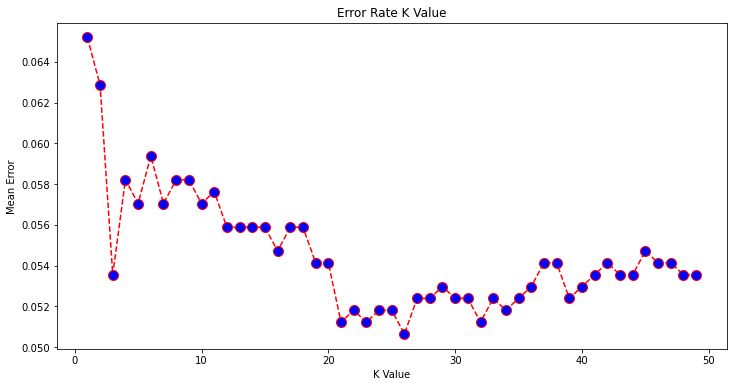

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')